<a href="https://colab.research.google.com/github/Riley-Hoang/3603-Programming-for-Data-Science/blob/main/Assignments/06-Working_with_Data_Adv/03_loading_and_exploring_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/sample_data/california_housing_train.csv'
df = pd.read_csv(file_path)

In [8]:
print("First 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())

First 5 rows:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0



Last 5 rows:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [10]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

Shape: (17000, 9)

Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [11]:
print("Info:")
df.info()

print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB

Missing values per column:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [12]:
print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
df.rename(columns={
    "housing_median_age": "median_age",
    "total_rooms": "total_rooms",
    "total_bedrooms": "total_bedrooms",
    "median_income": "income",
    "median_house_value": "house_value"
}, inplace=True)

print("After renaming columns:")
display(df.head(2))

After renaming columns:


,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,income,house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0


In [14]:
print("Number of duplicate rows:", df.duplicated().sum())

print("\nRange of numerical columns:")
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    print(f"{col}: min={df[col].min():.2f}, max={df[col].max():.2f}")

Number of duplicate rows: 0

Range of numerical columns:
longitude: min=-124.35, max=-114.31
latitude: min=32.54, max=41.95
median_age: min=1.00, max=52.00
total_rooms: min=2.00, max=37937.00
total_bedrooms: min=1.00, max=6445.00
population: min=3.00, max=35682.00
households: min=1.00, max=6082.00
income: min=0.50, max=15.00
house_value: min=14999.00, max=500001.00


In [15]:
missing_percentage = df.isnull().any(axis=1).mean() * 100
print(f"Percentage of rows with any missing values: {missing_percentage:.2f}%")

Percentage of rows with any missing values: 0.00%


In [16]:
unique_locations = df[['longitude', 'latitude']].drop_duplicates().shape[0]
print(f"Number of unique geographical locations: {unique_locations}")

Number of unique geographical locations: 11054


In [17]:
print("House value statistics:")
print(f"Minimum house value: ${df['house_value'].min():,}")
print(f"Maximum house value: ${df['house_value'].max():,}")
print(f"Average house value: ${df['house_value'].mean():,.2f}")
print(f"Median house value: ${df['house_value'].median():,}")

House value statistics:
Minimum house value: $14,999.0
Maximum house value: $500,001.0
Average house value: $207,300.91
Median house value: $180,400.0


In [18]:
print("Data Quality Check:")
print(f"Rows with zero rooms: {(df['total_rooms'] == 0).sum()}")
print(f"Rows with zero bedrooms: {(df['total_bedrooms'] == 0).sum()}")
print(f"Rows with zero population: {(df['population'] == 0).sum()}")
print(f"Rows with zero households: {(df['households'] == 0).sum()}")
print(f"Rows with zero income: {(df['income'] == 0).sum()}")

Data Quality Check:
Rows with zero rooms: 0
Rows with zero bedrooms: 0
Rows with zero population: 0
Rows with zero households: 0
Rows with zero income: 0


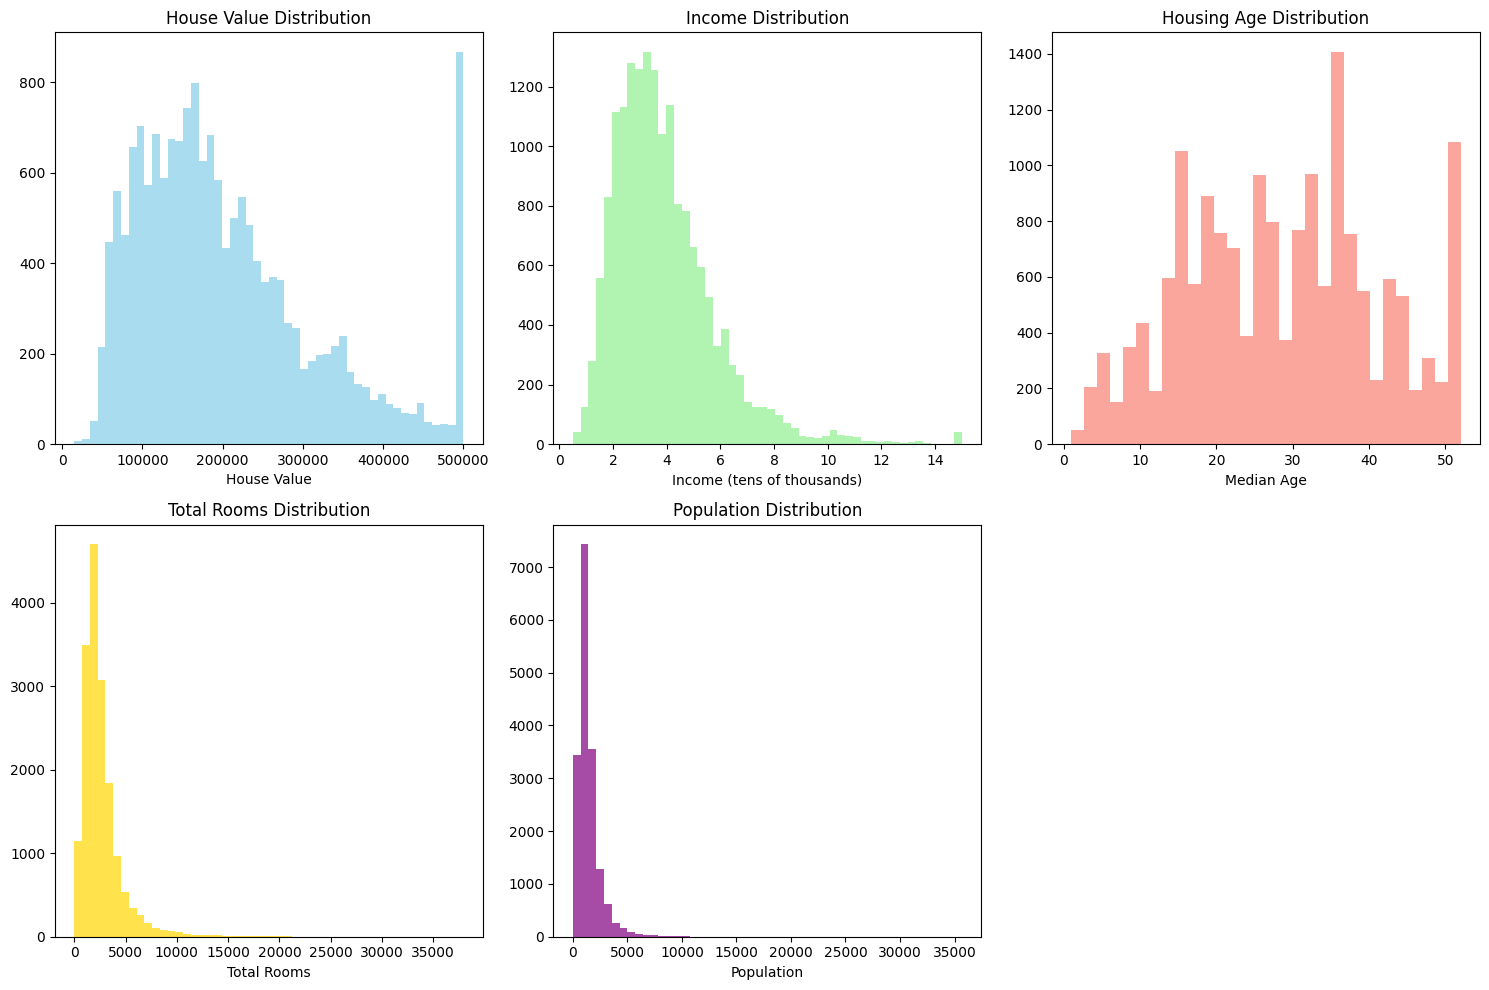

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# House value distribution
axes[0,0].hist(df['house_value'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('House Value Distribution')
axes[0,0].set_xlabel('House Value')

# Income distribution
axes[0,1].hist(df['income'], bins=50, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Income Distribution')
axes[0,1].set_xlabel('Income (tens of thousands)')

# Housing age distribution
axes[0,2].hist(df['median_age'], bins=30, alpha=0.7, color='salmon')
axes[0,2].set_title('Housing Age Distribution')
axes[0,2].set_xlabel('Median Age')

# Total rooms distribution
axes[1,0].hist(df['total_rooms'], bins=50, alpha=0.7, color='gold')
axes[1,0].set_title('Total Rooms Distribution')
axes[1,0].set_xlabel('Total Rooms')

# Population distribution
axes[1,1].hist(df['population'], bins=50, alpha=0.7, color='purple')
axes[1,1].set_title('Population Distribution')
axes[1,1].set_xlabel('Population')

fig.delaxes(axes[1,2])
plt.tight_layout()
plt.show()

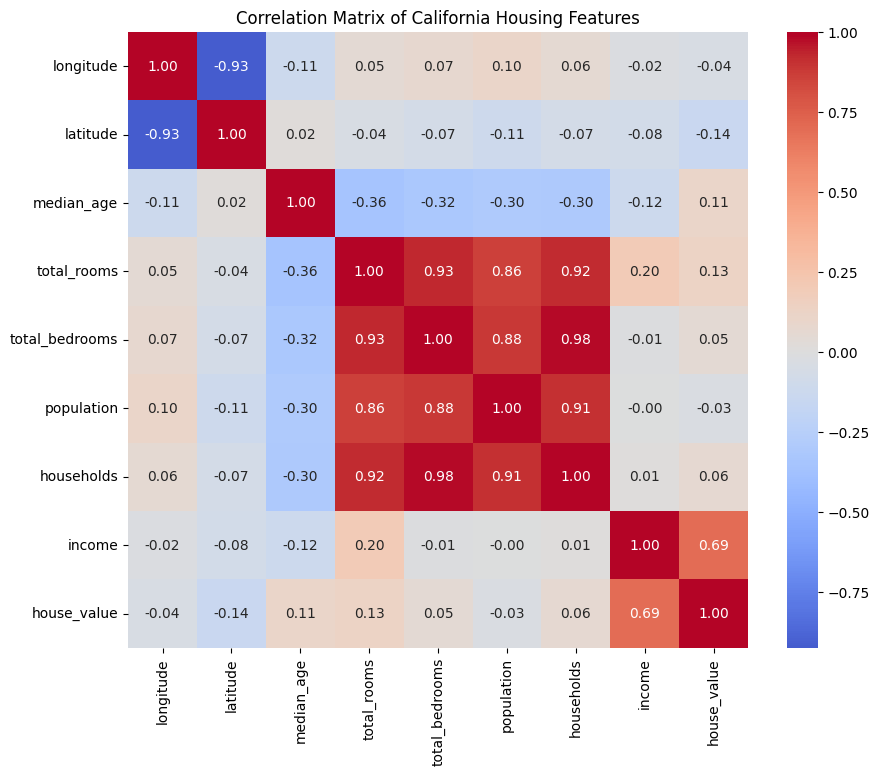

Top correlations with house value:
house_value       1.000000
income            0.691871
total_rooms       0.130991
median_age        0.106758
households        0.061031
total_bedrooms    0.045783
population       -0.027850
longitude        -0.044982
latitude         -0.144917
Name: house_value, dtype: float64


In [20]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of California Housing Features')
plt.show()

print("Top correlations with house value:")
house_value_corr = df.corr()['house_value'].sort_values(ascending=False)
print(house_value_corr)

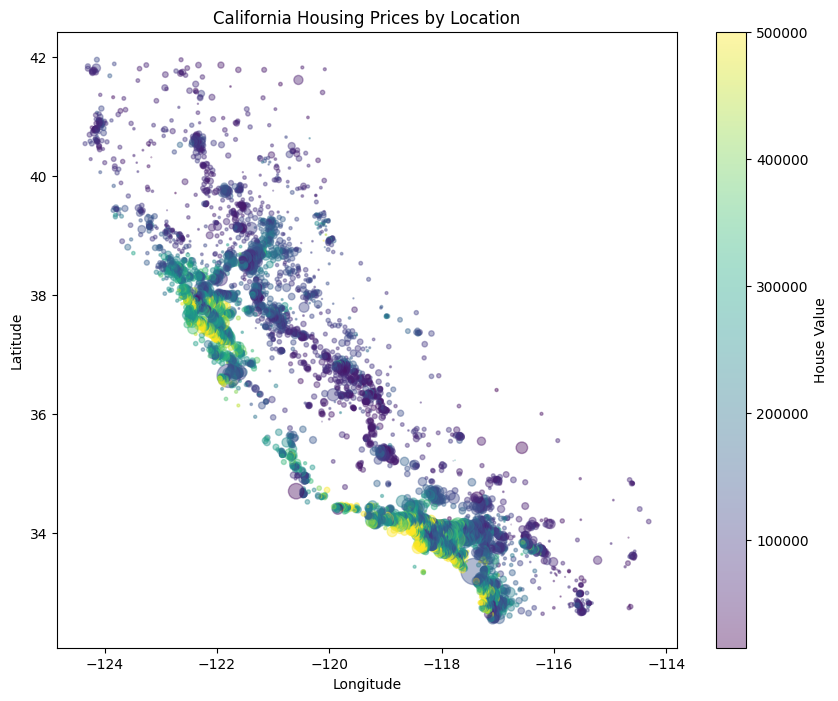

In [21]:
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.4,
           c=df['house_value'], cmap='viridis', s=df['population']/100)
plt.colorbar(label='House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices by Location')
plt.show()